<span style="font-size: 6px; float:right">Notebook created by Mieszko Fraś
<br>
<center><font size="6"><b>Digital Signal Processing Lab</b></font></center>
<br />
<center><font size="5"><b><u>FIR Filters</u></b></font></center>


My name is Mariusz Więcławek.
If you have collaborated with other peers while working on this notebooke, please annouce theirs names below.
- Michał Woźniak

# Introduction

FIR filter is a filter whose impulse response is of finite duration. In this notebook you will have to implement a few exercises that will expose you to FIR filter design methods.

## Reading list

Before working with the notebook, you might find it useful to become acquainted with the following materials:
- <span style="font-size: 12px">Section **12.1 Wprowadzenie** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **12.2 Metoda próbkowania w dziedzinie częstotliwości** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **12.5 Metoda okien** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>


# Necessary imports

You should not import anything else in order to complete exercises in this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Sample FIR that will be used in first part of this notebook. DO NOT CHANGE ANY OF THE COEFFICIENTS!

In [3]:
example_FIR = np.array([ 0.01097947, -0.01154252, -0.01216644,  0.01286166,  0.01364116,
       -0.01452123, -0.0155227 ,  0.01667252,  0.01800633, -0.01957209,
       -0.0214361 ,  0.02369253,  0.02647989, -0.03001054, -0.03462755,
        0.04092347,  0.05001757, -0.06430831, -0.09003163,  0.15005272,
        0.45015816,  0.45015816,  0.15005272, -0.09003163, -0.06430831,
        0.05001757,  0.04092347, -0.03462755, -0.03001054,  0.02647989,
        0.02369253, -0.0214361 , -0.01957209,  0.01800633,  0.01667252,
       -0.0155227 , -0.01452123,  0.01364116,  0.01286166, -0.01216644,
       -0.01154252])

## Usefull functions
Feel free to use these functions in this notebook, they can come in handy.

np.fft.fft(); np.convolve(); np.angle(); np.abs(); 


# Practical problem set

## Frequency amplitude and phase characteristics

### Exercise
Draw frequency [amplitude](https://en.wikipedia.org/wiki/Frequency_response) and [phase](https://en.wikipedia.org/wiki/Phase_response) responses of the filter with coefficients contained in example_FIR. FFT should be calculated at least in 512 points. Answer the questions.

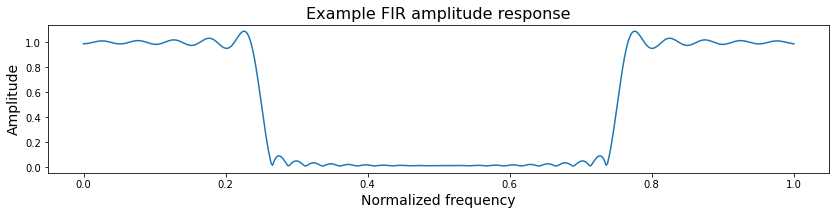

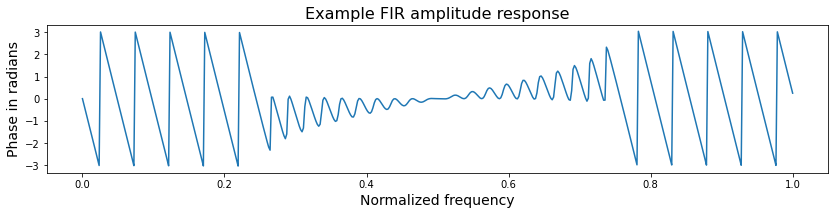

In [4]:
fs = 512

plt.figure(figsize = (14,6))
plt.subplot(2,1,1)
plt.plot(np.linspace(0,1,fs) ,np.abs(np.fft.fft(example_FIR,fs)))
plt.xlabel('Normalized frequency', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.title('Example FIR amplitude response', fontsize = 16)
plt.show()

plt.figure(figsize = (14,6))
plt.subplot(2,1,2)
plt.plot(np.linspace(0,1,fs) ,np.angle(np.fft.fft(example_FIR,fs)))
plt.xlabel('Normalized frequency', fontsize = 14)
plt.ylabel('Phase in radians', fontsize = 14)
plt.title('Example FIR amplitude response', fontsize = 16)
plt.show()

### Questions
- Based on the graphs above, answer what type of filter it is (low-pass, high-pass, band-pass, band-stop) and what is its the cutoff frequency.
- Is phase of this filter linear? Why?
- What are the requirements when designing a filter, to achieve linear phase.

hint: $\pi$ and $-\pi$ means the same phase

Na przedstawionych przebiegach amplitudy i fazy, możemy zauważyć, iż jest to filtr dolnoprzepustowy ponieważ przepuszcza amplitudy o niższych częstotliwościach a większe od częstotliwości odcięcia (która wynosi 0.25) tłumi niemalże do zera. Faza tego filtru jest liniowa, ponieważ w paśmie przepustowym zmienia się stale liniowo. Nagłe przeskoki wartości od około -3.14 do 3.14 wynikają z tego, że faza nie może wyjść poza zakres, a jednocześnie wartości fazy Pi oraz -Pi oznaczają tę samą wartość fazy. Jeżeli chcemy uzyskać liniową faze współczynniki muszą być symetryczne względem środkowego współczynnika, pierwsza wartość taka jak ostatnia, druga jak przedostatnia itd..

## Window method

### Exercise 

Implement a function that will design low-pass FIR filter using window method.
The algorithm consists of the following steps:

- Selection of the cutoff frequency. 
- Selection of the window function. 
- Determining the number of filter coefficients. 
- Calculation of the ideal filter according to the formula: 
$$ \large
h(n) = \frac{sin(f_{c}2n\pi)}{n\pi}
$$ where:
    - n is vector of consecutive numbers of the filter coefficients from -N/2 to N/2,
    - fc is normalized cutoff frequency from 0 to 1. 
- Multiplying sinc function with the selected window.

In [5]:
def lp_design_window(fc, N, window):  

    ### Your code goes here ##########
    
    start = int(-N/2)
    stop = int(N/2 +1)
    
    HH = []
    H = []
    
    for m in range(start,0):      # Dla ujemnych wspolczynnikow
        H =  [2*fc*((np.sin(2*np.pi*fc*m))/(2*np.pi*m*fc))]
        HH = np.concatenate((HH, H), axis=0)

    zerowy = [2*fc]              # Dla zerowego wspolczynnika
    HH = np.concatenate((HH, zerowy), axis=0)
    
    for m in range(1,stop):      # Dla dodatnich wspolczynnikow   
        H =  [2*fc*((np.sin(2*np.pi*fc*m))/(2*fc*np.pi*m))]
        HH = np.concatenate((HH, H), axis=0)    
    
    HH = window * HH
     
    return HH

Verify your solution. If spectrum of signal that is filtered using your implementation (on the third graph) is attenuated above 250 Hz similarly to the singal presented on second chart, filter is designed correctly. Check if your implementation works for different cutoff frequencies.

In [6]:
fc = 0.25               # Normalized cutoff frequency 
N = 41                  # Number of coefficients
window = np.ones((N))   # Rectangular window

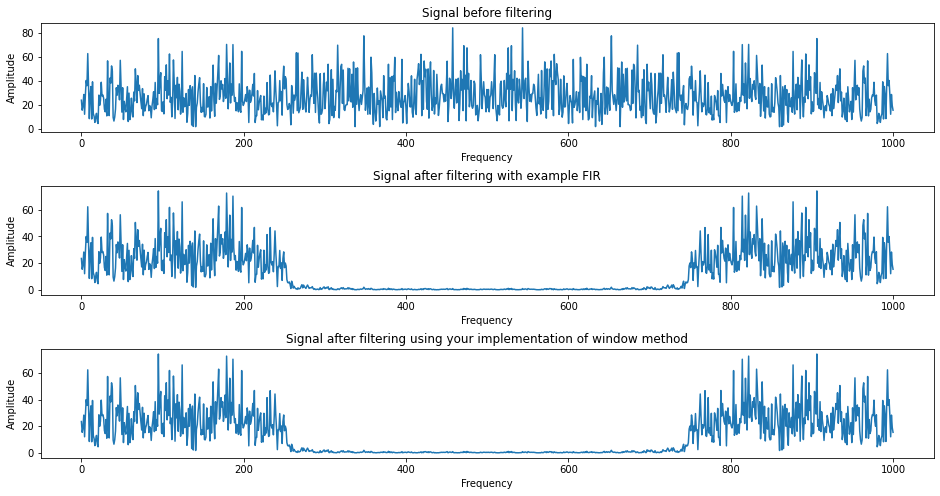

In [7]:
fs = 1000  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
signal = np.random.randn(*t.shape)

# Generate FIR coefficients
lp_filter = lp_design_window(fc, N, window)

# Reference filtering
filtered_ref = np.convolve(signal, example_FIR)

# Signal filtering
filtered = np.convolve(signal, lp_filter)

plt.figure(figsize = (16,8))
plt.subplot(3,1,1)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(signal,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal before filtering')

plt.subplot(3,1,2)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(filtered,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal after filtering with example FIR')

plt.subplot(3,1,3)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(filtered,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal after filtering using your implementation of window method')

plt.subplots_adjust(hspace = 0.5)
plt.show()

## Windows and Number of coefficients

### Exercise

Using your implementation design filters with three different window function ([rectangular](https://pl.wikipedia.org/wiki/Okno_czasowe#Okno_prostok%C4%85tne), [hanning](https://pl.wikipedia.org/wiki/Okno_czasowe#Okno_Hanna_(Hanninga)) and [hamming](https://pl.wikipedia.org/wiki/Okno_czasowe#Okno_Hamminga)). For each of these filters use 11, 51 and 151 coefficients. Plot frequency amplitude responses of these filters and answer the questions. Pay attention primarily to [transition band](https://en.wikipedia.org/wiki/Transition_band), [passband ripple](https://en.wikipedia.org/wiki/Filter_(signal_processing)#The_transfer_function), width of the mainlobe and strenght of the damping.

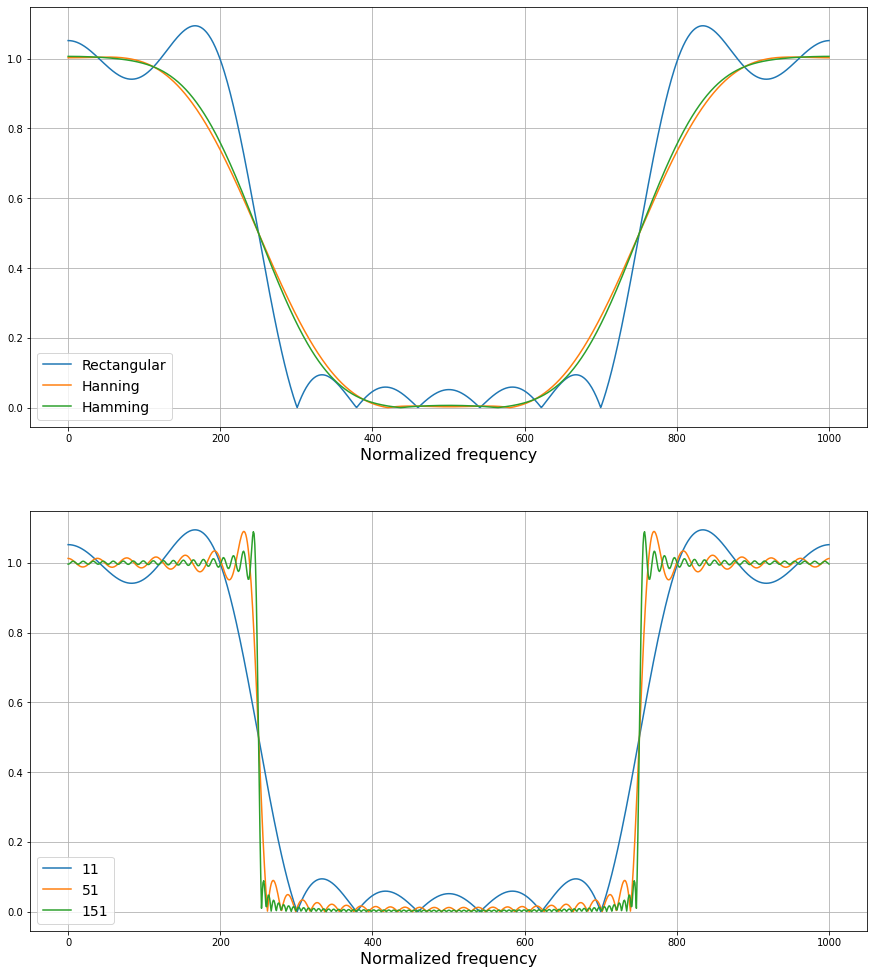

In [8]:
########## Your code goes here ###################################################     N = 11

fc = 0.25               # Normalized cutoff frequency 
N = 11
fs = 1000  # Sampling frequency
dt = 1/fs # Sampling interval
t = np.arange(0, 1, dt)

hann = np.hanning(N)
hamm = np.hamming(N)
rec = np.ones((N)) 


HH1 = lp_design_window(fc, N, rec)
HH2 = lp_design_window(fc, N, hann)
HH3 = lp_design_window(fc, N, hamm)

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,17))

ax1.plot(np.linspace(0,fs,1024) ,np.abs(np.fft.fft(HH1,1024)), label="Rectangular")   
ax1.plot(np.linspace(0,fs,1024) ,np.abs(np.fft.fft(HH2,1024)), label="Hanning")  
ax1.plot(np.linspace(0,fs,1024) ,np.abs(np.fft.fft(HH3,1024)), label="Hamming")  
ax1.set_xlabel('Normalized frequency', fontsize=16)
ax1.legend(fontsize=14)
ax1.grid()

###     N = 51  
    
N = 51
hann = np.ones((N)) 
HH_51 = lp_design_window(fc, N, hann)

###     N = 151

N = 151
hamm = np.ones((N))  
    
HH_151 = lp_design_window(fc, N, hamm)

###    Plot

ax2.plot(np.linspace(0,fs,1024) ,np.abs(np.fft.fft(HH1,1024)), label="11")   
ax2.plot(np.linspace(0,fs,1024) ,np.abs(np.fft.fft(HH_51,1024)), label="51")  
ax2.plot(np.linspace(0,fs,1024) ,np.abs(np.fft.fft(HH_151,1024)), label="151") 
ax2.set_xlabel('Normalized frequency', fontsize=16)
ax2.legend(fontsize=14)
ax2.grid()

### Question 

- What are the differences when the window is changed?
- What are the differences when the number of coefficients is changed?
- What is the tradeoff between different windows?

Jak widać okno prostokątne dla tej samej liczby współczynników ma najszybszy stan przejściowy między filtrowaniem danych częstotliwości. Natomiast w przypadku okna prostokątnego tłumienie jest jest znacznie gorsze, amplituda w paśmie zabronionym posiada znacznie większe wartości niż okna Hamminga i Hanninga. Również w przypadku pasma dozwolonego amplituda dla okna Hamminga i Hanninga utrzymuje stałe wartości a w przypadku okna prostokątnego te wartości mocno się rozbiegają.
Wraz ze wzrostem ilości współczynników obserwujemy lepsze odwzorowanie oczekiwanego przebiegu. Możemy precyzyjniej kontrolować wartości filtrowanych częstotliwości.

## Frequency Sampling Method

### Exercise

Implement a function that will design a FIR filter with a given characteristic using frequency sampling method.
The algorithm consists of the following steps:

- Selection of the cutoff frequency 
- Determining the number of filter coefficients 
- Determining desired frequency response
- Sampling frequency response
- Performing IFFT
- Shifting coefficients
- Removal of unsymmetrical value

In [9]:
def lp_design_fs(H):
    """
    This function should design FIR filter using algorithm presented above.
    Hint: What are the requirements to get a real signal from idft?
    Parameters
    ----------
    H: Numpy array containing half of the filter frequency response.
    
    Returns
    -------
    h: numpy array containing coefficients of filter (impulse response).

    """
    
    N = len(H)
    if N%2==0:     # Dla parzystych/nieparzystych wspolczynnikow N
        H = H[:(int(len(H)))]
    else:
        H = H[:(int(len(H)+1))]
    H1 = H[::-1]   # Symetria widma
    H = np.concatenate((H, H1), axis=0) # Widmo dla 0:fs
    
    H = np.real(np.fft.ifft(H))   # Odwrotna transformata 
    ODCIĘTA = H[int(len(H)/2)+1:] # Bierzemy widmo po częst. Nyquista
    H = H[0:int(len(H)/2)+1]
    H = np.concatenate((ODCIĘTA,H),axis=0) # Przesunięcie kołowe
    H = H[0:len(H)-1] # Odejmujemy niesymetryczny element
    
    return H

Verify you implementation. 

In [10]:
# Częstotliwość odcięcia 0-0.5
fg = 0.25

# Liczba współczynników połowy widma 0-fs/2
N = 8

# Half of the frequency amplitude response
H = np.zeros((N,), dtype=int)
F_CUTT = int(fg*N+0.5)     # Dla ktorego N wystepuje czestotliwosc odcięcia
ONES = np.ones((F_CUTT,), dtype=int)
H = H[F_CUTT::]
H = np.concatenate((ONES, H), axis=0)    # Niesymetryczne widmo częstotliwosciowe
print(H)

[1 1 0 0 0 0 0 0]


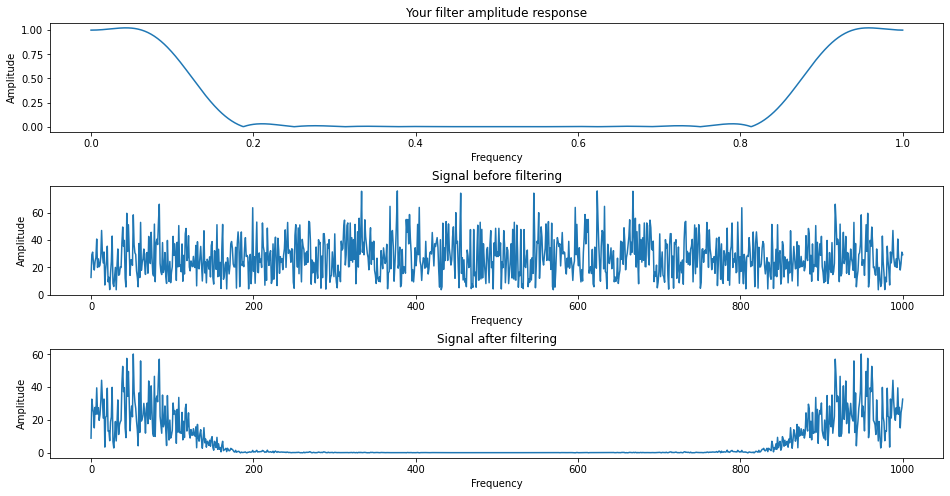

In [11]:
fs = 1e3  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
signal = np.random.randn(*t.shape)

# Generate FIR coefficients
lp_filter = lp_design_fs(H)

# Signal filtering
filtered = np.convolve(signal, lp_filter)

plt.figure(figsize = (16,8))
plt.subplot(3,1,1)
plt.plot(np.linspace(0,1,1000), np.abs(np.fft.fft(lp_filter,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Your filter amplitude response')

plt.subplot(3,1,2)
plt.plot(np.linspace(0,fs,1000), np.abs(np.fft.fft(signal,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal before filtering')

plt.subplot(3,1,3)
plt.plot(np.linspace(0,fs,1000), np.abs(np.fft.fft(filtered,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal after filtering')

plt.subplots_adjust(hspace = 0.5)
plt.show()

###  Exercise*
Try to design frequency response above (H) to minimize impact of ripples without changing the number of coefficients.

hint: What is the tradeoff between transition band width and ripples?

## Transitions between filter types

You can easily calculate coefficients of high-pass filter using the relationship between the low-pass and high-pass filters:
$$\large
h_{hp}[n] = \delta(n) - h_{lp}[n]$$

You can also use fast trick to switch form low-pass to high-pass filter:
$$\large
h_{hp}[n] = (-1)^{n}h_{lp}[n]$$
hint: Using the second method will shift your cutoff frequency by 0.5.

### Exercise
Implement a function that will design the highpass filter with a given cutoff frequency and number of coefficients using window method. You should use previously implemented functions.

In [12]:
def hp_design(fc, N, window):
    """
    This function should design high-pass filter using low-pass filter.
   
    Parameters
    ----------
    fc: Int containing cutoff frequency of filter.
    N: Int containing number of filter coefficients.
    window: numpy array of shape (N, ) containing window function.
    
    Returns
    -------
    h: Numpy array of shape (N, ) containing coefficients of filter (impulse response)

    """
    start = int(-N/2)
    stop = int(N/2+1)
    
    HH = []
    H = []
    
    for m in range(start,0): # Dla ujemnych współczynników
        H =  [(-1)**m*(2*fc*((np.sin(2*np.pi*fc*m))/(2*np.pi*m*fc)))]
        HH = np.concatenate((HH, H), axis=0)

    zerowy = [2*fc]  # Dla zerowego
    HH = np.concatenate((HH, zerowy), axis=0)
    
    for m in range(1,stop): # Dla dodatniego
        H =  [(-1)**m*(2*fc*((np.sin(2*np.pi*fc*m))/(2*fc*np.pi*m)))]
        HH = np.concatenate((HH, H), axis=0)    
    
    HH = window * HH # Dodatkowo przemnożenie przez okno
     
    return HH

Verify your implementation. If filtered signal is attenuated below 250 Hz filter is designed correctly. Check if it works for different cutoff frequencies.

In [13]:
fc = 0.25               # Normalized frequency cutoff
N = 41                  # Number of coefficients
window = np.ones((N))   # Rectangular window

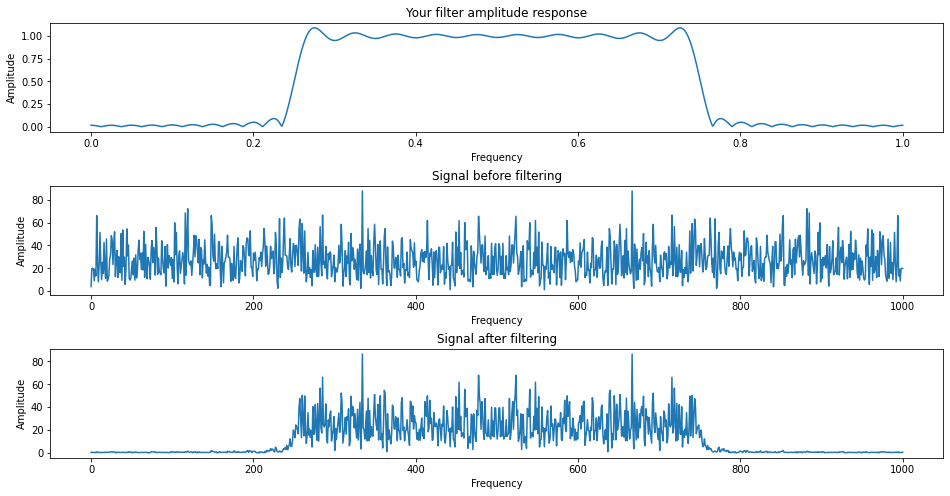

In [14]:
fs = 1e3  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
signal = np.random.randn(*t.shape)

# Generate FIR coefficients
hp_filter = hp_design(fc,N, window)

# Signal filtering
filtered = np.convolve(signal, hp_filter)

plt.figure(figsize = (16,8))
plt.subplot(3,1,1)
plt.plot(np.linspace(0,1,1000), np.abs(np.fft.fft(hp_filter,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Your filter amplitude response')

plt.subplot(3,1,2)
plt.plot(np.linspace(0,fs,1000), np.abs(np.fft.fft(signal,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal before filtering')

plt.subplot(3,1,3)
plt.plot(np.linspace(0,fs,1000), np.abs(np.fft.fft(filtered,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal after filtering')

plt.subplots_adjust(hspace = 0.5)
plt.show()

## Band-pass filters

### Exercise

The final task is to implement the function that will design [band-pass](https://en.wikipedia.org/wiki/Band-pass_filter) filter using window method AND that will perform filtration on imput signal.

Hint: Use previously implemented functions.

In [15]:
def bandpass_filter(signal, fl, fh, N, window):
    """
    This function should design band-pass filter using low-pass and high-pass filter.
   
    Parameters
    ----------
    signal: numpy array containing signal for filtration.
    fl: Int containing lower cutoff frequency of filter.
    fh: Int containing upper cutoff frequency of filter.
    N: Int containing number of filter coefficients.
    window: numpy array of shape (N, ) containing window function.
    
    Returns
    -------
    X: numpy array containing filtered signal
    
    hint: How to obtain band-pass frequency response using low-pass and high-pass filters?
    """

    ### Calc filter response
    start = int(-N/2)
    stop = int(N/2+1)
    H = []
    HH = []

    for m in range(start,0):
        H =  [(-1)*((2*fl*(np.sin(2*fl*np.pi*m))/(2*fl*np.pi*m))-(2*fh*(np.sin(2*fh*np.pi*m))/(2*fh*np.pi*m)))]
        HH = np.concatenate((HH, H), axis=0)

    zerowy = [(2*(fh-fl))]
    HH = np.concatenate((HH, zerowy), axis=0)

    for m in range(1,stop):
        H =  [(-1)*((2*fl*(np.sin(2*fl*np.pi*m))/(2*fl*np.pi*m))-(2*fh*(np.sin(2*fh*np.pi*m))/(2*fh*np.pi*m)))]
        HH = np.concatenate((HH, H), axis=0)     

    ###
    WYNIK = HH*window # filter response
    X = np.convolve(signal, WYNIK) # signal after filtering
    
    plt.figure(figsize = (16,6))
    plt.subplot(2,1,1)
    plt.plot(np.linspace(0,1,1000), (np.abs(np.fft.fft((WYNIK),1000))))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title('Filter amplitude response')

    return X

Verify your implementation. Check if it works correctly for different bands.

In [16]:
fl = 0.1               # Band start
fh = 0.4               # Band stop
N = 41                 # Number of coefficients
window = np.ones((N))  # Rectangular window

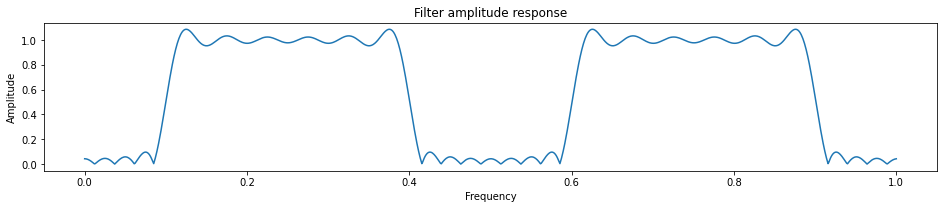

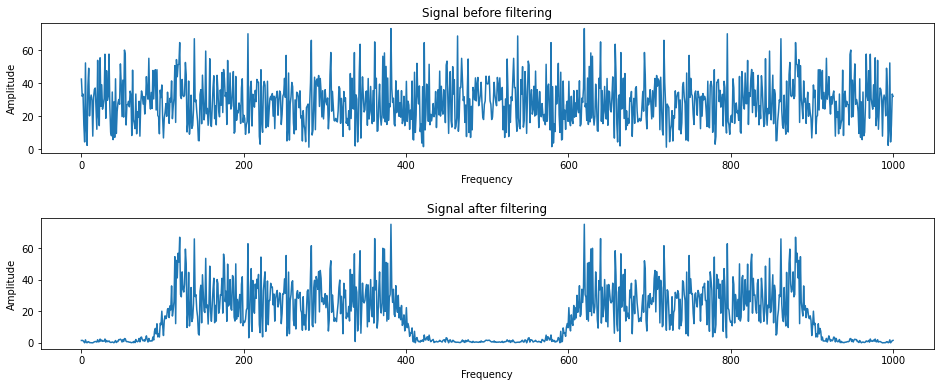

In [17]:
fs = 1e3  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate white noise signal
signal = np.random.randn(*t.shape)

# Filter the signal using your implementation
filtered = bandpass_filter(signal,fl,fh,N,window)

plt.figure(figsize = (16,6))
plt.subplot(2,1,1)
plt.plot(np.linspace(0,fs,1000), np.abs(np.fft.fft(signal,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal before filtering')

plt.subplot(2,1,2)
plt.plot(np.linspace(0,fs,1000), np.abs(np.fft.fft(filtered,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Signal after filtering')

plt.subplots_adjust(hspace = 0.5)
plt.show()